In [79]:
import requests
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw

In [80]:


def cas_to_smiles(cas):

    #if not is_valid_cas(cas):
        #return "Invalid CAS number format"
    
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{cas}/property/IsomericSMILES/JSON"
    
    try:
        response = requests.get(url)
        response.raise_for_status() 
        data = response.json()
        
        smiles = data['PropertyTable']['Properties'][0]['IsomericSMILES']
        return smiles
    except requests.exceptions.RequestException as e:
        return f"Error fetching data: {e}"
    except (KeyError, IndexError):
        return "CAS number not found or SMILES not available"



In [81]:
df = pd.read_csv("est_pine.csv")
df.head()

,Unnamed: 0,oil_id,compound_id,composition,id,name,name_sort,cas,weight,formula
0,0,3133,4,0.281,2,Tricyclene ...,TRICYCLENE,508-32-7,,NaN
1,1,3133,10,0.237,3,alpha-Thujene ...,ALPHATHUJENE,3917-48-4,,NaN
2,2,3133,129,0.049,4,alpha-Pinene ...,ALPHAPINENE,80-56-8,,NaN
3,3,3133,50,0.048,5,Camphene ...,CAMPHENE,79-92-5,,NaN
4,4,3133,5,0.034,6,Sabinene ...,SABINENE,3387-41-5,,NaN


In [82]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.head()

,Unnamed: 0,oil_id,compound_id,composition,id,name,name_sort,cas,weight,formula
0,0,3133,4,0.281,2,Tricyclene,TRICYCLENE,508-32-7,,NaN
1,1,3133,10,0.237,3,alpha-Thujene,ALPHATHUJENE,3917-48-4,,NaN
2,2,3133,129,0.049,4,alpha-Pinene,ALPHAPINENE,80-56-8,,NaN
3,3,3133,50,0.048,5,Camphene,CAMPHENE,79-92-5,,NaN
4,4,3133,5,0.034,6,Sabinene,SABINENE,3387-41-5,,NaN


In [83]:
df.loc[46, "cas"] = "502-61-4"
df.loc[46]

Unnamed: 0                  46
oil_id                    3133
compound_id               1013
composition              0.001
id                         233
name           alpha-Farnesene
name_sort       ALPHAFARNESENE
cas                   502-61-4
weight                        
formula                    NaN
Name: 46, dtype: object

In [84]:
df.loc[53, "cas"] = "19435-97-3"
df.loc[53]

Unnamed: 0                 53
oil_id                   3133
compound_id               122
composition            0.0005
id                       3649
name           alpha-Muurolol
name_sort       ALPHAMUUROLOL
cas                19435-97-3
weight                       
formula                   NaN
Name: 53, dtype: object

In [85]:
cas_numbers = list(df["cas"])
cas_numbers

['508-32-7',
 '3917-48-4',
 '80-56-8',
 '79-92-5',
 '3387-41-5',
 '127-91-3',
 '123-35-3',
 '99-83-2',
 '13466-78-9',
 '99-86-5',
 '99-87-6',
 '138-86-3',
 '555-10-2',
 '3779-61-1',
 '99-85-4',
 '586-62-9',
 '507-70-0',
 '562-74-3',
 '98-55-5',
 '106-22-9',
 '106-24-1',
 '470-82-6',
 '76-22-2',
 '76-49-3',
 '80-26-2',
 '141-12-8',
 '105-87-3',
 '87-44-5',
 '6753-98-6',
 '475-20-7',
 '31983-22-9',
 '483-76-1',
 '39029-41-9',
 '29350-73-0',
 '3856-25-5',
 '947-59-1',
 '17699-14-8',
 '515-13-9',
 '77129-48-7',
 '1139-30-6',
 '3691-12-1',
 '20307-84-0',
 '30021-74-0',
 '5937-11-1',
 '19912-62-0',
 '481-34-5',
 '502-61-4',
 '5208-59-3',
 '15423-57-1',
 '483-77-2',
 '88-84-6',
 '18252-44-3',
 '25548-04-3',
 '19435-97-3']

In [86]:
molecules = [ cas_to_smiles(cas) if cas != '' else '' for cas in cas_numbers ] 
molecules

['CC1(C2CC3C1(C3C2)C)C',
 'CC1=CC[C@]2([C@@H]1C2)C(C)C',
 'CC1=CCC2CC1C2(C)C',
 'CC1(C2CCC(C2)C1=C)C',
 'CC(C)C12CCC(=C)C1C2',
 'CC1(C2CCC(=C)C1C2)C',
 'CC(=CCCC(=C)C=C)C',
 'CC1=CCC(C=C1)C(C)C',
 'CC1=CCC2C(C1)C2(C)C',
 'CC1=CC=C(CC1)C(C)C',
 'CC1=CC=C(C=C1)C(C)C',
 'CC1=CCC(CC1)C(=C)C',
 'CC(C)C1CCC(=C)C=C1',
 'CC(=CC/C=C(\\C)/C=C)C',
 'CC1=CCC(=CC1)C(C)C',
 'CC1=CCC(=C(C)C)CC1',
 'CC1(C2CCC1(C(C2)O)C)C',
 'CC1=CCC(CC1)(C(C)C)O',
 'CC1=CCC(CC1)C(C)(C)O',
 'CC(CCC=C(C)C)CCO',
 'CC(=CCC/C(=C/CO)/C)C',
 'CC1(C2CCC(O1)(CC2)C)C',
 'CC1(C2CCC1(C(=O)C2)C)C',
 'CC(=O)O[C@@H]1C[C@@H]2CC[C@]1(C2(C)C)C',
 'CC1=CCC(CC1)C(C)(C)OC(=O)C',
 'CC(=CCC/C(=C\\COC(=O)C)/C)C',
 'CC(=CCC/C(=C/COC(=O)C)/C)C',
 'C/C/1=C\\CCC(=C)[C@H]2CC([C@@H]2CC1)(C)C',
 'C/C/1=C\\CC(/C=C/C/C(=C/CC1)/C)(C)C',
 'C[C@]12CCCC([C@@H]3[C@H]1CC[C@@H]3C2=C)(C)C',
 'CC1=C[C@@H]2[C@H](CC1)C(=CC[C@H]2C(C)C)C',
 'CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C',
 'CC1=C[C@H]2[C@H](CC1)C(=C)CC[C@@H]2C(C)C',
 'CC1CCC2C(C1)C(CC=C2C)C(C)C',
 'CC1=CC

In [87]:
for i,mol in enumerate(molecules):
    if mol=='':
        print(i) 

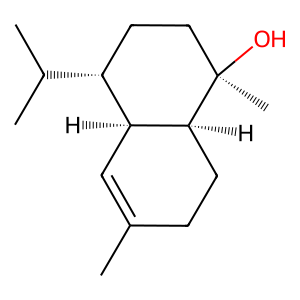

In [88]:
mol = Chem.MolFromSmiles(molecules[53])
Draw.MolToImage(mol)


In [89]:
df['smiles'] = molecules
df.head()

,Unnamed: 0,oil_id,compound_id,composition,id,name,name_sort,cas,weight,formula,smiles
0,0,3133,4,0.281,2,Tricyclene,TRICYCLENE,508-32-7,,NaN,CC1(C2CC3C1(C3C2)C)C
1,1,3133,10,0.237,3,alpha-Thujene,ALPHATHUJENE,3917-48-4,,NaN,CC1=CC[C@]2([C@@H]1C2)C(C)C
2,2,3133,129,0.049,4,alpha-Pinene,ALPHAPINENE,80-56-8,,NaN,CC1=CCC2CC1C2(C)C
3,3,3133,50,0.048,5,Camphene,CAMPHENE,79-92-5,,NaN,CC1(C2CCC(C2)C1=C)C
4,4,3133,5,0.034,6,Sabinene,SABINENE,3387-41-5,,NaN,CC(C)C12CCC(=C)C1C2


In [90]:
df[["id","name", "name_sort", "cas", "weight", "formula", "smiles"]].head()

,id,name,name_sort,cas,weight,formula,smiles
0,2,Tricyclene,TRICYCLENE,508-32-7,,NaN,CC1(C2CC3C1(C3C2)C)C
1,3,alpha-Thujene,ALPHATHUJENE,3917-48-4,,NaN,CC1=CC[C@]2([C@@H]1C2)C(C)C
2,4,alpha-Pinene,ALPHAPINENE,80-56-8,,NaN,CC1=CCC2CC1C2(C)C
3,5,Camphene,CAMPHENE,79-92-5,,NaN,CC1(C2CCC(C2)C1=C)C
4,6,Sabinene,SABINENE,3387-41-5,,NaN,CC(C)C12CCC(=C)C1C2


In [91]:
df[["oil_id", "compound_id","composition" ]].sort_values(by='compound_id').reset_index(drop=True).head()

,oil_id,compound_id,composition
0,3133,2,0.007
1,3133,3,0.002
2,3133,4,0.281
3,3133,5,0.034
4,3133,6,0.010


In [92]:
new_df = pd.concat([df[["oil_id", "compound_id","composition" ]].sort_values(by='compound_id').reset_index(drop=True), df[["id","name", "name_sort", "cas", "weight", "formula", "smiles"]]], axis=1).sort_values(by='composition', ascending=False).reset_index(drop=True)
new_df.head()

,oil_id,compound_id,composition,id,name,name_sort,cas,weight,formula,smiles
0,3133,4,0.281,4,alpha-Pinene,ALPHAPINENE,80-56-8,,NaN,CC1=CCC2CC1C2(C)C
1,3133,10,0.237,10,delta-3-Carene,DELTACARENE,13466-78-9,,NaN,CC1=CCC2C(C1)C2(C)C
2,3133,129,0.049,129,Caryophyllene oxide,CARYOPHYLLENEOXIDE,1139-30-6,,NaN,C[C@@]12CC[C@@H]3[C@H](CC3(C)C)C(=C)CC[C@H]1O2
3,3133,50,0.048,50,delta-Cadinene,DELTACADINENE,483-76-1,,NaN,CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C
4,3133,5,0.034,5,Camphene,CAMPHENE,79-92-5,,NaN,CC1(C2CCC(C2)C1=C)C


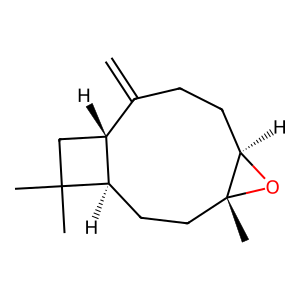

In [93]:
Draw.MolToImage(Chem.MolFromSmiles("C[C@@]12CC[C@@H]3[C@H](CC3(C)C)C(=C)CC[C@H]1O2"))

In [94]:
basic_smiles = []
for smiles_with_chirality in new_df["smiles"]:
    mol = Chem.MolFromSmiles(smiles_with_chirality)

    if mol:
        # Remove chirality information
        for atom in mol.GetAtoms():
            atom.SetChiralTag(Chem.rdchem.ChiralType.CHI_UNSPECIFIED)

        # Generate a new SMILES string without chirality
        smiles_without_chirality = Chem.MolToSmiles(mol, isomericSmiles=False)
        basic_smiles.append(smiles_without_chirality)

basic_smiles

['CC1=CCC2CC1C2(C)C',
 'CC1=CCC2C(C1)C2(C)C',
 'C=C1CCC2OC2(C)CCC2C1CC2(C)C',
 'CC1=CC2C(=C(C)CCC2C(C)C)CC1',
 'C=C1C2CCC(C2)C1(C)C',
 'C=C1CCC=C(C)CCC2C1CC2(C)C',
 'CC1=CC2C(CC1)C(C)=CCC2C(C)C',
 'CC1=CC2C(C(C)C)CCC(C)(O)C2CC1',
 'CC1=CCC(=C(C)C)CC1',
 'C=C1CCC2CC1C2(C)C',
 'C=CC(=C)CCC=C(C)C',
 'C=C1CCC(C(C)C)C2C=C(C)CCC12',
 'CC(=O)OC1CC2CCC1(C)C2(C)C',
 'C=CC(C)=CCC=C(C)C',
 'C=C1CCC(C(C)C)C2C=C(C)CCC12',
 'C=C1CCC2(C(C)C)CC12',
 'CC1=CC2C(C(C)C)CCC(C)(O)C2CC1',
 'C=C(C)C1CC=C(C)CC1',
 'C=CC(C)=CCC=C(C)CCC=C(C)C',
 'CC1(C)C2CC3C(C2)C31C',
 'CC12CCC(CC1)C(C)(C)O2',
 'C=C1C=CC(C(C)C)CC1',
 'CC(=O)OC(C)(C)C1CC=C(C)CC1',
 'CC1=CCCC(C)=CCC(C)(C)C=CC1',
 'CC1=CC2C(C(C)C)CCC(C)(O)C2CC1',
 'CC1=CCC(O)(C(C)C)CC1',
 'CC1(C)C2CCC1(C)C(O)C2',
 'C=CC1(C)CCC(C(=C)C)CC1C(=C)C',
 'CC1=CCC(C(C)C)=CC1',
 'CC1=CCC2(C(C)C)CC12',
 'Cc1ccc2c(c1)C(C(C)C)CCC2C',
 'CC1=CC2C(C(C)C)CCC(C)(O)C2CC1',
 'C=CC(=C)CCC=C(C)CCC=C(C)C',
 'CC1=CCC(=C(C)C)CCC(C)=CCC1',
 'CC1=CC=C(C(C)C)CC1',
 'CC1=CCC(C(C)C)C=C1',
 'C=

In [95]:
new_df.head()

,oil_id,compound_id,composition,id,name,name_sort,cas,weight,formula,smiles
0,3133,4,0.281,4,alpha-Pinene,ALPHAPINENE,80-56-8,,NaN,CC1=CCC2CC1C2(C)C
1,3133,10,0.237,10,delta-3-Carene,DELTACARENE,13466-78-9,,NaN,CC1=CCC2C(C1)C2(C)C
2,3133,129,0.049,129,Caryophyllene oxide,CARYOPHYLLENEOXIDE,1139-30-6,,NaN,C[C@@]12CC[C@@H]3[C@H](CC3(C)C)C(=C)CC[C@H]1O2
3,3133,50,0.048,50,delta-Cadinene,DELTACADINENE,483-76-1,,NaN,CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C
4,3133,5,0.034,5,Camphene,CAMPHENE,79-92-5,,NaN,CC1(C2CCC(C2)C1=C)C


In [96]:
new_df["basic_smiles"]=basic_smiles
new_df.head()

,oil_id,compound_id,composition,id,name,name_sort,cas,weight,formula,smiles,basic_smiles
0,3133,4,0.281,4,alpha-Pinene,ALPHAPINENE,80-56-8,,NaN,CC1=CCC2CC1C2(C)C,CC1=CCC2CC1C2(C)C
1,3133,10,0.237,10,delta-3-Carene,DELTACARENE,13466-78-9,,NaN,CC1=CCC2C(C1)C2(C)C,CC1=CCC2C(C1)C2(C)C
2,3133,129,0.049,129,Caryophyllene oxide,CARYOPHYLLENEOXIDE,1139-30-6,,NaN,C[C@@]12CC[C@@H]3[C@H](CC3(C)C)C(=C)CC[C@H]1O2,C=C1CCC2OC2(C)CCC2C1CC2(C)C
3,3133,50,0.048,50,delta-Cadinene,DELTACADINENE,483-76-1,,NaN,CC1=C[C@H]2[C@@H](CCC(=C2CC1)C)C(C)C,CC1=CC2C(=C(C)CCC2C(C)C)CC1
4,3133,5,0.034,5,Camphene,CAMPHENE,79-92-5,,NaN,CC1(C2CCC(C2)C1=C)C,C=C1C2CCC(C2)C1(C)C


In [97]:

output_file = 'smiles_pine.csv'
new_df.to_csv(output_file, index=False)

print("\nResults:")
print(new_df)


Results:
    oil_id  compound_id  composition    id                       name  \
0     3133            4       0.2810     4               alpha-Pinene   
1     3133           10       0.2370    10             delta-3-Carene   
2     3133          129       0.0490   129        Caryophyllene oxide   
3     3133           50       0.0480    50             delta-Cadinene   
4     3133            5       0.0340     5                   Camphene   
5     3133           44       0.0290    44         beta-Caryophyllene   
6     3133           48       0.0280    48            alpha-Muurolene   
7     3133          210       0.0270   210              alpha-Cadinol   
8     3133           18       0.0260    18                Terpinolene   
9     3133            7       0.0210     7                beta-Pinene   
10    3133            8       0.0210     8                    Myrcene   
11    3133          178       0.0200   178            gamma-Muurolene   
12    3133           39       0.0180    3